In [114]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [115]:
from PIL import Image
import pytesseract

In [116]:
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
from umap import UMAP 

In [117]:
raws = pytesseract.image_to_boxes(Image.open('pics/test1.jpg')).split('\n')[:-1]
matrix = [[raw[0]] + [int(el) for el in raw.split(' ')[1:-1]] for raw in raws]

In [118]:
dataset = (pd.DataFrame(np.array(matrix)).rename({
    0: 'char',
    1: 'x1',
    2: 'y1',
    3: 'x2',
    4: 'y2' 
    }, axis=1)
    .astype({
            'char': str,
            'x1': int,
            'x2': int,
            'y1': int,
            'y2': int,
    }))

In [119]:
dataset['x_centroid'] = dataset['x1'] + (dataset['x2'] - dataset['x1'] /2)
dataset['y_centroid'] = dataset['y1'] + (dataset['y2'] - dataset['y1'] /2)
dataset['zero'] = 0
dataset['shape'] = abs(dataset['y2'] - dataset['y1']) * abs(dataset['x2'] - dataset['x1'])

/home/denissimo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Outlier detection'}, xlabel='shape'>

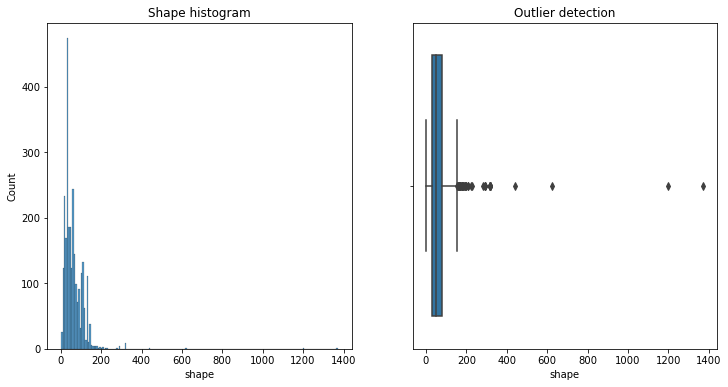

In [120]:
_, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].set_title('Shape histogram')
axs[1].set_title('Outlier detection')

sns.histplot(dataset, x='shape', ax=axs[0])
sns.boxplot(dataset['shape'], ax=axs[1])

In [121]:
slice_list = [i for i in range(1, 5)]

L2 distances

In [122]:
from scipy.spatial import distance_matrix

l2_matrix = distance_matrix(dataset[['x_centroid', 'y_centroid']], dataset[['x_centroid', 'y_centroid']], p=10)
# l2_matrix_n_neigh = np.sort(l2_matrix, axis=0).take(slice_list, axis=0)
l2_distances = l2_matrix.flatten()

<AxesSubplot:ylabel='Count'>

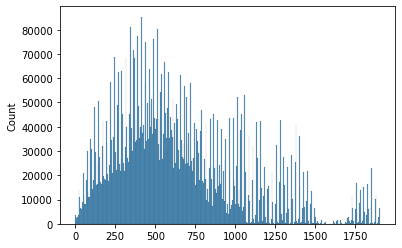

In [123]:
sns.histplot(l2_distances)

In [127]:
np.std(l2_distances)

388.6420602692115

X axis distances

In [124]:
x_matrix = distance_matrix(dataset[['x_centroid', 'zero']], dataset[['x_centroid', 'zero']])
x_matrix_n_neigh = np.sort(x_matrix, axis=0).take(slice_list, axis=0)
x_distances = x_matrix.flatten()

<AxesSubplot:ylabel='Count'>

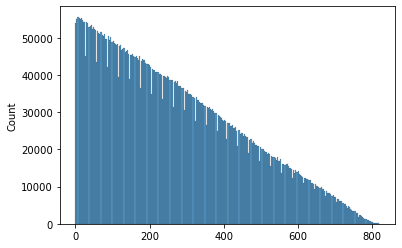

In [129]:
sns.histplot(x_distances)

Y axis distances

<AxesSubplot:ylabel='Count'>

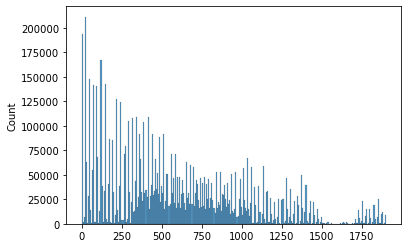

In [130]:
y_matrix = distance_matrix(dataset[['y_centroid', 'zero']], dataset[['y_centroid', 'zero']])
y_matrix_n_neigh = np.sort(y_matrix, axis=0).take(slice_list, axis=0)
y_distances = y_matrix.flatten()
sns.histplot(y_distances)